<a href="https://colab.research.google.com/github/Aryannn2412/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("/content/creditcard.csv")


In [4]:

data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
print(data.shape)
print(data.describe())


(75357, 31)
               Time            V1            V2            V3            V4  \
count  75357.000000  75357.000000  75357.000000  75357.000000  75357.000000   
mean   36110.239845     -0.252779     -0.028574      0.678975      0.166227   
std    14826.849221      1.877372      1.660941      1.402475      1.370891   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    29808.000000     -1.014563     -0.595725      0.190522     -0.725740   
50%    39061.000000     -0.246462      0.070645      0.766814      0.185626   
75%    47465.000000      1.153590      0.724071      1.398870      1.049550   
max    56021.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  75357.000000  75357.000000  75357.000000  75357.000000  75357.000000   
mean      -0.274493      0.097547     -0.114049      0.054618      0.003693   
std        1.387110      1.305219      

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.002434384685990981
Fraud Cases: 183
Valid Transactions: 75173


In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     183.000000
mean       95.022350
std       216.587987
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [10]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


count    75173.000000
mean        97.392540
std        271.227608
min          0.000000
25%          7.690000
50%         26.760000
75%         88.960000
max      19656.530000
Name: Amount, dtype: float64

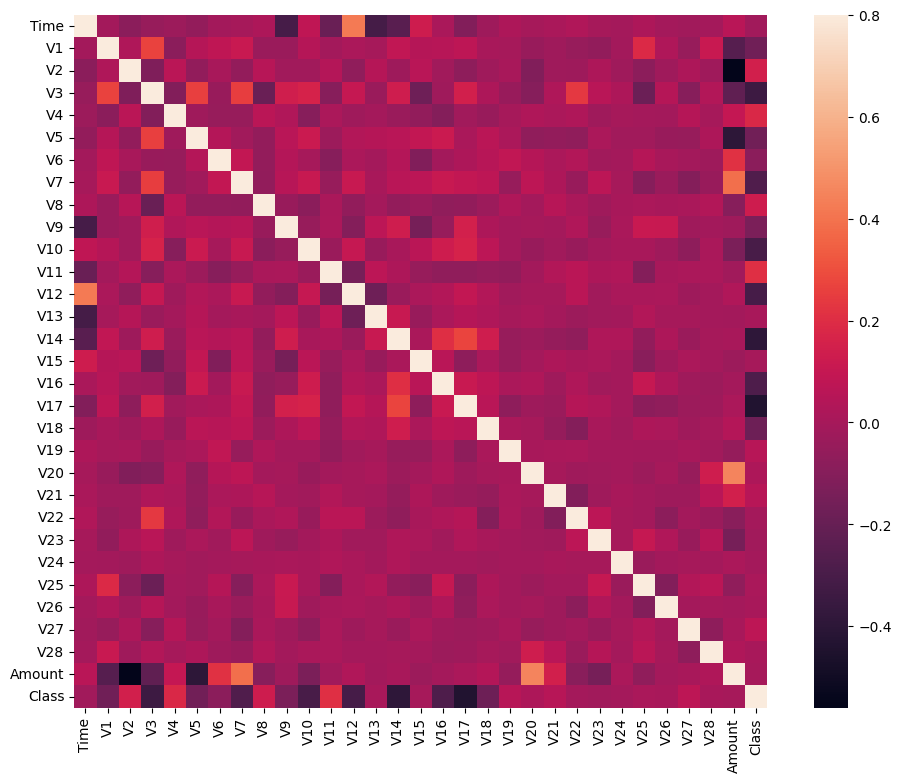

In [11]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [12]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(75357, 30)
(75357,)


In [16]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


In [25]:
# Assuming yTrain contains NaN values that need to be handled
# You can replace NaN values in yTrain with a suitable strategy, such as median imputation or mode imputation
from sklearn.impute import SimpleImputer

# Reshape yTrain to a 2D array
yTrain_reshaped = yTrain.reshape(-1, 1)

# Instantiate a SimpleImputer to handle missing values in yTrain
target_imputer = SimpleImputer(strategy='median')  # You can choose a different strategy as needed

# Fit the imputer on yTrain and transform it
yTrain_imputed = target_imputer.fit_transform(yTrain_reshaped)

# Reshape yTrain_imputed back to a 1D array (if needed)
yTrain_imputed = yTrain_imputed.ravel()

# Create and fit the RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain_imputed, yTrain_imputed)

# Make predictions
yPred = rfc.predict(xTest_imputed)


In [26]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9995355626326964
The precision is 0.9666666666666667
The recall is 0.8285714285714286
The F1-Score is 0.8923076923076922
The Matthews correlation coefficient is0.8947388548866971


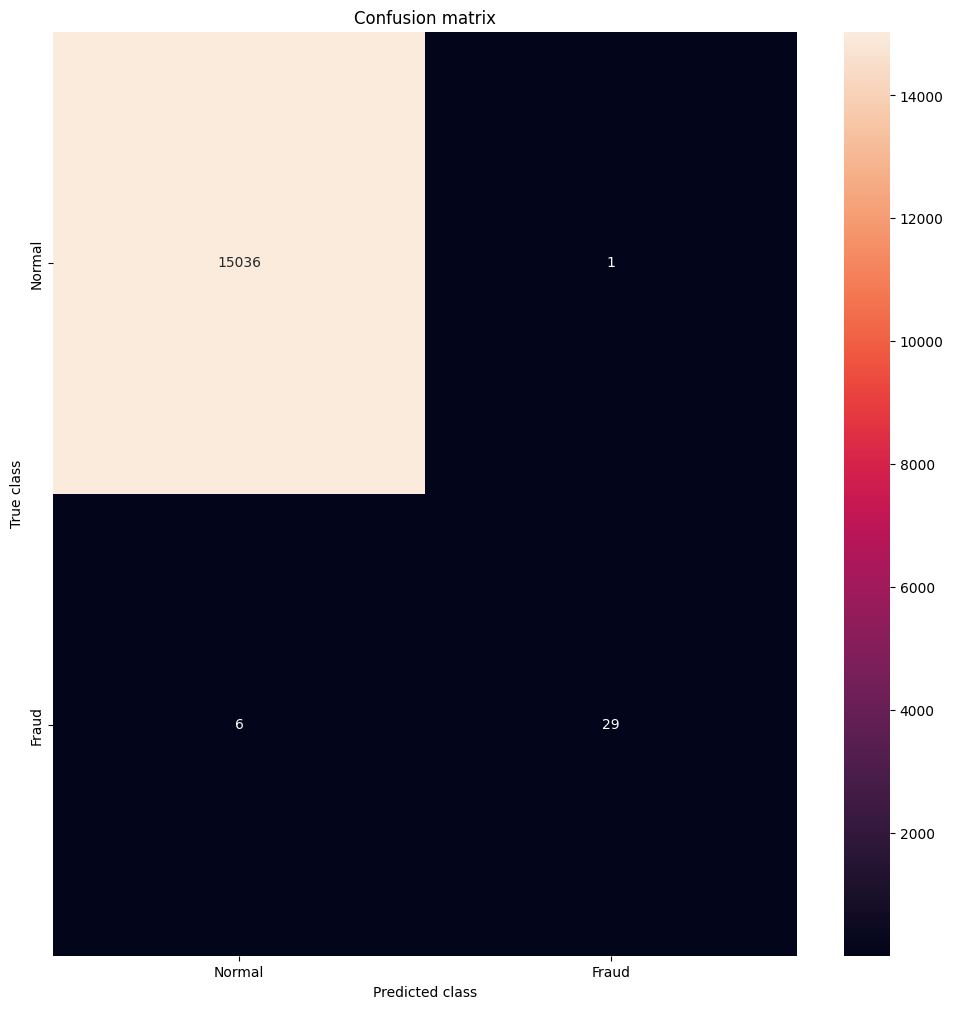

In [27]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
